## Experimenting with kaggle smiling-or-not-face dataset.

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
import shutil

# Used for Model building
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras import Sequential


### Get paths for the dataset

In [2]:
non_smile_path_src = '/kaggle/input/smiling-or-not-face-data/non_smile'
smile_path_src = '/kaggle/input/smiling-or-not-face-data/smile'
test = '/kaggle/input/smiling-or-not-face-data/test'

### Copy the datasets into working directory in kaggle

In [3]:
shutil.copytree(non_smile_path_src, 'train_images/non_smile')

'train_images/non_smile'

In [4]:
shutil.copytree(smile_path_src, 'train_images/smile')

'train_images/smile'

In [5]:
shutil.copytree(test, 'test_samples/test_imgs')

'test_samples/test_imgs'

In [6]:
train_data_set = tf.keras.utils.image_dataset_from_directory(directory = './train_images',
                                                            labels='inferred',
                                                            label_mode='categorical',
                                                            image_size=(28,28))


Found 1203 files belonging to 2 classes.


2022-09-29 13:53:16.904296: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [7]:
class_names = train_data_set.class_names
print(class_names)

['non_smile', 'smile']


### A function to plot few images to check 

In [8]:
def plot_images(tf_dataset, no_imgs_to_plot = 4, class_names = class_names, model=None):
    plt.figure(figsize=(10, 10))
    
    if model is None:
        for images, labels in tf_dataset.take(1):
            for i in range(no_imgs_to_plot):
                ax = plt.subplot(4, 4, i + 1)
                plt.imshow(images[i].numpy().astype("uint8"))
                plt.title(class_names[np.argmax(labels[i])])
                plt.axis("off")
    else:
        for images, labels in tf_dataset.take(1):
            for i in range(no_imgs_to_plot):
                sample = images[i]
                sample = sample[np.newaxis,...]
                ax = plt.subplot(4, 4, i + 1)
                plt.imshow(images[i].numpy().astype("uint8"))
                print(model.predict(sample))
                plt.title(class_names[np.argmax(model.predict(sample))])
                plt.axis("off")
        

### Model building

In [9]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',  input_shape=(28,28,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3), activation='relu'))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(2, activation='softmax'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                7

In [11]:
model.compile(optimizer='Adam',
             loss='categorical_crossentropy',
             metrics='accuracy')

In [12]:
history = model.fit(train_data_set, batch_size=32, epochs=10, 
                   shuffle=True)

Epoch 1/10


2022-09-29 13:53:18.182043: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


38/38 [==============================] - 2s 18ms/step - loss: 4.0186 - accuracy: 0.6334
Epoch 2/10
38/38 [==============================] - 1s 18ms/step - loss: 0.3305 - accuracy: 0.8670
Epoch 3/10
38/38 [==============================] - 1s 17ms/step - loss: 0.2281 - accuracy: 0.9135
Epoch 4/10
38/38 [==============================] - 1s 17ms/step - loss: 0.1619 - accuracy: 0.9377
Epoch 5/10
38/38 [==============================] - 1s 17ms/step - loss: 0.1579 - accuracy: 0.9352
Epoch 6/10
38/38 [==============================] - 1s 17ms/step - loss: 0.1360 - accuracy: 0.9501
Epoch 7/10
38/38 [==============================] - 1s 17ms/step - loss: 0.1060 - accuracy: 0.9593
Epoch 8/10
38/38 [==============================] - 1s 16ms/step - loss: 0.1120 - accuracy: 0.9543
Epoch 9/10
38/38 [==============================] - 1s 17ms/step - loss: 0.0624 - accuracy: 0.9809
Epoch 10/10
38/38 [==============================] - 1s 18ms/step - loss: 0.0519 - accuracy: 0.9825


Plot of Loss vs epochs

In [13]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

Text(0.5, 1.0, 'Loss V/S epochs')

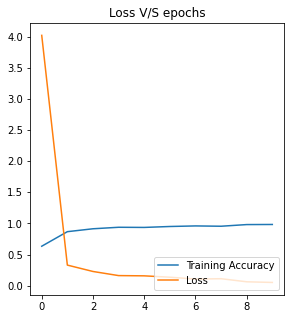

In [14]:
acc = history.history['accuracy'] 

loss = history.history['loss']


epochs_range = range(10)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, loss, label='Loss')
plt.legend(loc='lower right')
plt.title('Loss V/S epochs')


In [15]:
test_data = tf.keras.utils.image_dataset_from_directory('./test_samples',
                                                        labels='inferred',
                                                        label_mode='categorical',
                                                        image_size=(28,28))

Found 12030 files belonging to 1 classes.


In [16]:
class_names_test = test_data.class_names
print(class_names_test)

['test_imgs']


[[0.96365    0.03634996]]
[[0.0153648 0.9846352]]
[[0.8513729  0.14862707]]
[[0.99815243 0.00184753]]


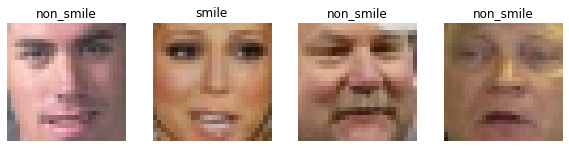

In [17]:
plot_images(test_data,model=model)